In [1]:
%matplotlib inline
from sklearn.datasets import fetch_lfw_people
# fetch_lfw_people (it allows to load a dataset of images)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

image_shape (87, 65)


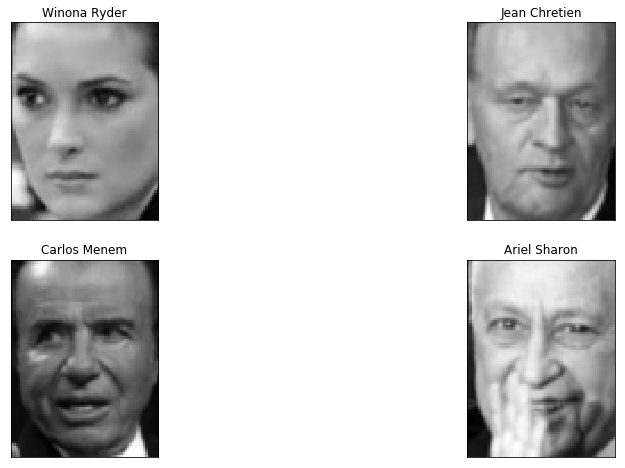

In [2]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
print('image_shape',image_shape)
fig, axes = plt.subplots(2, 2, figsize=(15, 8),subplot_kw={'xticks': (), 'yticks': ()})
#'xticks': (), 'yticks': () deleting planes (x,y)
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap = 'gray')
    ax.set_title(people.target_names[target])

In [34]:
#Example
my_list = ['apple', 'banana', 'grapes', 'pear','apple']
for (c, value) in enumerate(my_list):
    print(c, value)

0 apple
1 banana
2 grapes
3 pear
4 apple


In [44]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))
# count how often each target appears
counts = np.bincount(people.target)
print('counts',counts[0:10])
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    #print ('i',i,'count',count)
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

people.images.shape: (3023, 87, 65)
Number of classes: 62
counts [39 35 21 36 20 77 42 24 29 21]
Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42 

In [4]:
# To make the data less skewed, only take up to 50 images of each person
#np.bool Boolean (True or False) stored as a byte
mask = np.zeros(people.target.shape, dtype=np.bool) #se tienen un numero por cada personaje

print(people.target.shape)
#Find the unique elements of an array
print(np.unique(people.target))
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:60]] = 1

print(people.data.shape) #85+27 es un vector por cada imagen
print(people.target)
    
X_people = people.data[mask] #coloca todas las imagenes
y_people = people.target[mask] #

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
X_people = X_people / 255.
print(X_people.shape)

(3023,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]
(3023, 5655)
[61 25  9 ... 14 15 14]
(2155, 5655)


In [5]:
#1NN classifier
from sklearn.neighbors import KNeighborsClassifier   #clasificado de vecinos más cercanos
# split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)  # se entrena el algorimos
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test))) # semide desempñeo con el metodo score

Test set score of 1-nn: 0.24


In [6]:
#We enable the whitening option of PCA: Use standardScaler after the 
#transformation. Fit the PCA object and extract the first 100 principal components
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
#whiten(ajusta la informacion redondita, porque antes esta estirada)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1616, 100)


In [7]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.33


In [8]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=0.1)
lr.fit(X_train_pca, y_train)
print("LR test set accuracy: {:.2f}".format(lr.score(X_test_pca, y_test)))

LR test set accuracy: 0.51
